<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 1: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 2: Loading and Exploring the Data

In [2]:
xls = pd.ExcelFile('/content/bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
CLIENT_INFO = pd.read_excel(xls,'CLIENT_INFO')

In [5]:
LOAN_HISTORY = pd.read_excel(xls,'LOAN_HISTORY')

In [6]:
MARKETING_HISTORY = pd.read_excel(xls,'MARKETING HISTORY')

In [7]:
SUBSCRIPTION =   pd.read_excel(xls,'SUBSCRIPTION HISTORY')

In [8]:
CLIENT_INFO.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58.0,management,married,tertiary
1,2837,44.0,technician,single,secondary
2,2838,33.0,entrepreneur,married,secondary
3,2839,47.0,blue-collar,married,unknown
4,2840,33.0,unknown,single,unknown


In [9]:
MARKETING_HISTORY.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown
1,2837,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown
2,2838,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown
3,2839,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown
4,2840,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown


In [10]:
LOAN_HISTORY.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143.0,yes,no
1,2837,no,29.0,yes,no
2,2838,no,2.0,yes,yes
3,2839,no,1506.0,yes,no
4,2840,no,1.0,no,no


In [11]:
SUBSCRIPTION.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [12]:
df =  pd.merge(CLIENT_INFO,LOAN_HISTORY,on=['ID'])

In [13]:
df =  pd.merge(df,MARKETING_HISTORY,on=['ID'])

In [14]:
df =  pd.merge(df,SUBSCRIPTION,on=['ID'])

In [15]:
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,2837,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,2838,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,2839,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,2840,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [17]:
df.drop(['ID'],axis=1,inplace=True)

In [18]:
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


### Task 3: Data Prep & Start H2O

In [20]:
pip install h2o

     |████████████████████████████████| 176.2 MB 80 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.3-py2.py3-none-any.whl size=176244303 sha256=ac23812cab970adf33298367c2be3bda237462a4404015389f6ef01344bd4d8d
  Stored in directory: /root/.cache/pip/wheels/b5/71/a5/02087a05e5644158183e1c58eeae3f9356a4d1e80659fb2dfb
Successfully built h2o


In [21]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbuoh3tve
  JVM stdout: /tmp/tmpbuoh3tve/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbuoh3tve/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,"14 days, 21 hours and 47 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_ljeh73
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [22]:
h2o_frame = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [23]:
type(h2o_frame)

h2o.frame.H2OFrame

In [24]:
h2o_frame.head()

AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [25]:
h2o_frame.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.936210214328106,,,,,1362.2720576850802,,,,15.80641879188694,,258.1630797814691,2.763840658246891,40.197827962221574,0.5803233726305549,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685234,,,,8.32247615304459,,257.52781226517124,3.0980208832791747,100.12874599059825,2.3034410449312213,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [28]:
train,test = h2o_frame.split_frame(ratios=[.75])
x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [29]:
from h2o.automl import H2OAutoML

In [30]:
df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [32]:
aml = H2OAutoML(max_runtime_secs=600,balance_classes=True,
                stopping_metric='logloss',project_name='Final',seed=1)
%time aml.train(x=x,y=y,training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 9.45 s, sys: 641 ms, total: 10.1 s
Wall time: 10min 3s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20220303_155533

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.032264433099026886
RMSE: 0.17962303053625078
LogLoss: 0.11480387320709368
Null degrees of freedom: 10053
Residual degrees of freedom: 10044
Null deviance: 7263.87301708041
Residual deviance: 2308.4762824482395
AIC: 2328.4762824482395
AUC: 0.988044963584294
AUCPR: 0.9197537011446792
Gini: 0.9760899271685879

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45762621818302873: 


,,no,yes,Error,Rate
0,no,8673.0,203.0,0.0229,(203.0/8876.0)
1,yes,176.0,1002.0,0.1494,(176.0/1178.0)
2,Total,8849.0,1205.0,0.0377,(379.0/10054.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.457626,0.840957,163.0
1,max f2,0.283805,0.882675,225.0
2,max f0point5,0.557065,0.864886,130.0
3,max accuracy,0.473653,0.962701,158.0
4,max precision,0.981277,1.000000,0.0
5,max recall,0.065983,1.000000,329.0
6,max specificity,0.981277,1.000000,0.0
7,max absolute_mcc,0.464042,0.819764,161.0
8,max min_per_class_accuracy,0.312584,0.944908,215.0
9,max mean_per_class_accuracy,0.274716,0.948483,228.0



Gains/Lift Table: Avg response rate: 11.72 %, avg score: 12.70 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010046,0.932358,8.534805,8.534805,1.000000,0.963661,1.000000,0.963661,0.085739,0.085739,753.480475,753.480475,0.085739
1,2,0.020092,0.856025,8.534805,8.534805,1.000000,0.891675,1.000000,0.927668,0.085739,0.171477,753.480475,753.480475,0.171477
2,3,0.030038,0.803455,8.108065,8.393500,0.950000,0.828958,0.983444,0.894983,0.080645,0.252122,710.806452,739.350004,0.251559
3,4,0.040084,0.758339,8.281296,8.365379,0.970297,0.779775,0.980149,0.866109,0.083192,0.335314,728.129570,736.537935,0.334413
4,5,0.050030,0.720740,7.937368,8.280288,0.930000,0.739432,0.970179,0.840925,0.078947,0.414261,693.736842,728.028771,0.412572
5,6,0.100060,0.536225,6.973767,7.627027,0.817097,0.634380,0.893638,0.737652,0.348896,0.763158,597.376691,662.702731,0.751103
6,7,0.149990,0.346539,3.332314,6.197355,0.390438,0.437990,0.726127,0.637898,0.166384,0.929542,233.231421,519.735491,0.883012
7,8,0.200020,0.189609,1.102907,4.923110,0.129225,0.263981,0.576827,0.544372,0.055178,0.984720,10.290717,392.310965,0.888843
8,9,0.299980,0.060735,0.152862,3.333554,0.017910,0.113327,0.390584,0.400738,0.015280,1.000000,-84.713783,233.355438,0.792925
9,10,0.400040,0.022576,0.000000,2.499751,0.000000,0.037589,0.292889,0.309906,0.000000,1.000000,-100.000000,149.975137,0.679585




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.061683789537548765
RMSE: 0.24836221439170003
LogLoss: 0.19523429711608437
Null degrees of freedom: 33982
Residual degrees of freedom: 33974
Null deviance: 24579.32332504483
Residual deviance: 13269.294237791792
AIC: 13287.294237791792
AUC: 0.9356058298248638
AUCPR: 0.6346792317524697
Gini: 0.8712116596497277

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.312825693178695: 


,,no,yes,Error,Rate
0,no,27690.0,2305.0,0.0768,(2305.0/29995.0)
1,yes,1072.0,2916.0,0.2688,(1072.0/3988.0)
2,Total,28762.0,5221.0,0.0994,(3377.0/33983.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.312826,0.633294,214.0
1,max f2,0.121313,0.737462,296.0
2,max f0point5,0.498348,0.612645,141.0
3,max accuracy,0.502319,0.909572,139.0
4,max precision,0.980038,1.000000,0.0
5,max recall,0.000622,1.000000,399.0
6,max specificity,0.980038,1.000000,0.0
7,max absolute_mcc,0.303029,0.584456,218.0
8,max min_per_class_accuracy,0.155035,0.863777,279.0
9,max mean_per_class_accuracy,0.107712,0.870979,303.0



Gains/Lift Table: Avg response rate: 11.74 %, avg score: 11.73 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010005,0.826516,7.243117,7.243117,0.850000,0.867478,0.850000,0.867478,0.072467,0.072467,624.311685,624.311685,0.070767
1,2,0.020010,0.761554,6.566424,6.904771,0.770588,0.792924,0.810294,0.830201,0.065697,0.138164,556.642427,590.477056,0.133864
2,3,0.030015,0.707808,5.914794,6.574779,0.694118,0.734321,0.771569,0.798241,0.059178,0.197342,491.479438,557.477850,0.189574
3,4,0.040020,0.668523,5.363415,6.271938,0.629412,0.688070,0.736029,0.770698,0.053661,0.251003,436.341525,527.193769,0.239034
4,5,0.050025,0.633325,5.388478,6.095246,0.632353,0.649994,0.715294,0.746557,0.053912,0.304915,438.847793,509.524574,0.288779
5,6,0.100021,0.475786,4.679450,5.387556,0.549147,0.552486,0.632245,0.649550,0.233952,0.538867,367.945021,438.755624,0.497193
6,7,0.150016,0.322915,3.611151,4.795537,0.423779,0.398719,0.562770,0.565956,0.180542,0.719408,261.115129,379.553741,0.645096
7,8,0.200012,0.193219,2.226877,4.153467,0.261330,0.255952,0.487421,0.488467,0.111334,0.830742,122.687663,315.346669,0.714590
8,9,0.300003,0.067207,1.158578,3.155268,0.135962,0.119942,0.370280,0.365637,0.115848,0.946590,15.857770,215.526828,0.732554
9,10,0.399994,0.025898,0.348576,2.453647,0.040906,0.042411,0.287942,0.284837,0.034855,0.981444,-65.142359,145.364693,0.658757


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [33]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_1_20220303_155533,0.935606,0.195234,0.634679,0.172826,0.248362,0.0616838
StackedEnsemble_AllModels_1_AutoML_1_20220303_155533,0.935211,0.195763,0.63288,0.171041,0.248769,0.061886
StackedEnsemble_BestOfFamily_3_AutoML_1_20220303_155533,0.935138,0.195826,0.632689,0.165242,0.248745,0.0618742
StackedEnsemble_BestOfFamily_1_AutoML_1_20220303_155533,0.934403,0.198234,0.623733,0.165079,0.250235,0.0626177
StackedEnsemble_BestOfFamily_2_AutoML_1_20220303_155533,0.934036,0.197311,0.626424,0.169907,0.249849,0.0624246
GBM_1_AutoML_1_20220303_155533,0.93379,0.206675,0.623667,0.165052,0.255774,0.0654201
GBM_2_AutoML_1_20220303_155533,0.933404,0.203608,0.625126,0.164116,0.253729,0.0643784
GBM_3_AutoML_1_20220303_155533,0.931572,0.208057,0.622339,0.176689,0.255864,0.0654662
XGBoost_3_AutoML_1_20220303_155533,0.93068,0.315722,0.615451,0.188945,0.317043,0.100516
GBM_5_AutoML_1_20220303_155533,0.929838,0.209552,0.615138,0.167333,0.256703,0.0658963


In [35]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:929: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


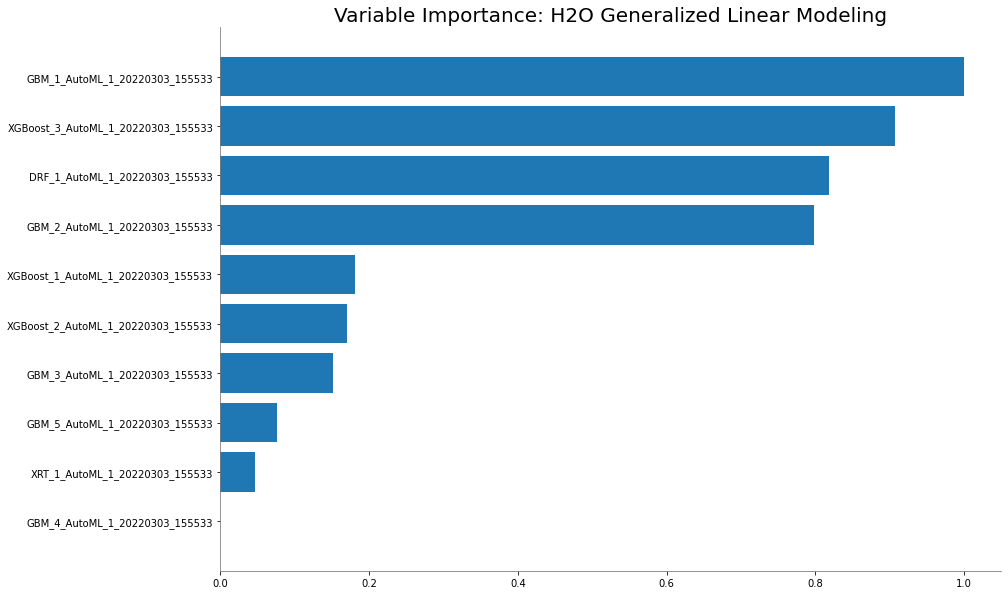

<Figure size 432x288 with 0 Axes>

In [37]:
metalearner.varimp_plot()

In [38]:
metalearner.varimp()

[('GBM_1_AutoML_1_20220303_155533',
  0.6411874294281006,
  1.0,
  0.24093385385385266),
 ('XGBoost_3_AutoML_1_20220303_155533',
  0.5812119245529175,
  0.9064618204872208,
  0.21839733978136527),
 ('DRF_1_AutoML_1_20220303_155533',
  0.524704098701477,
  0.8183318552727719,
  0.19716384762224212),
 ('GBM_2_AutoML_1_20220303_155533',
  0.5120143890380859,
  0.7985409032344427,
  0.1923955372762107),
 ('XGBoost_1_AutoML_1_20220303_155533',
  0.11628217250108719,
  0.1813544170770841,
  0.04369441861980082),
 ('XGBoost_2_AutoML_1_20220303_155533',
  0.10941093415021896,
  0.17063798996778015,
  0.041112468536812316),
 ('GBM_3_AutoML_1_20220303_155533',
  0.09738384932279587,
  0.1518804718452703,
  0.036593147406822533),
 ('GBM_5_AutoML_1_20220303_155533',
  0.04935305193066597,
  0.07697133422388806,
  0.018545000190834292),
 ('XRT_1_AutoML_1_20220303_155533',
  0.029711326584219933,
  0.04633797423433674,
  0.011164386712059278),
 ('GBM_4_AutoML_1_20220303_155533', 0.0, 0.0, 0.0),
 ('G

### Task 7: Base Learner XGBoost Model Exploration

In [39]:
model = h2o.get_model('GBM_1_AutoML_1_20220303_155533')

In [40]:
model.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.06368225186079537
RMSE: 0.25235342648911147
LogLoss: 0.19940445812943727
Mean Per-Class Error: 0.15620760994150457
AUC: 0.9383925020056094
AUCPR: 0.6178800754915075
Gini: 0.8767850040112188

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19631168863626816: 


,,no,yes,Error,Rate
0,no,9130.0,797.0,0.0803,(797.0/9927.0)
1,yes,302.0,999.0,0.2321,(302.0/1301.0)
2,Total,9432.0,1796.0,0.0979,(1099.0/11228.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.196312,0.645140,240.0
1,max f2,0.071484,0.746598,314.0
2,max f0point5,0.269040,0.606420,206.0
3,max accuracy,0.394384,0.909512,153.0
4,max precision,0.901585,1.000000,0.0
5,max recall,0.001413,1.000000,398.0
6,max specificity,0.901585,1.000000,0.0
7,max absolute_mcc,0.194339,0.600418,241.0
8,max min_per_class_accuracy,0.099630,0.869331,296.0
9,max mean_per_class_accuracy,0.071484,0.877500,314.0



Gains/Lift Table: Avg response rate: 11.59 %, avg score:  8.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010064,0.743579,6.491807,6.491807,0.752212,0.792263,0.752212,0.792263,0.065334,0.065334,549.180685,549.180685,0.062514
1,2,0.020039,0.664375,6.164489,6.328875,0.714286,0.701848,0.733333,0.747257,0.061491,0.126826,516.448885,532.887522,0.120781
2,3,0.030014,0.613054,6.010377,6.223024,0.696429,0.637884,0.721068,0.710907,0.059954,0.186779,501.037663,522.302406,0.177310
3,4,0.040078,0.562572,6.262684,6.232983,0.725664,0.587946,0.722222,0.680030,0.063028,0.249808,526.268425,523.298318,0.237216
4,5,0.050053,0.521686,4.931591,5.973631,0.571429,0.541390,0.692171,0.652401,0.049193,0.299001,393.159108,497.363101,0.281574
5,6,0.100018,0.352119,4.738195,5.356463,0.549020,0.430637,0.620659,0.541618,0.236741,0.535742,373.819536,435.646325,0.492828
6,7,0.150071,0.220086,3.961946,4.891348,0.459075,0.282585,0.566766,0.455222,0.198309,0.734051,296.194551,389.134813,0.660514
7,8,0.200036,0.120151,2.353714,4.257505,0.272727,0.167011,0.493321,0.383234,0.117602,0.851653,135.371393,325.750450,0.737016
8,9,0.300053,0.035163,0.991368,3.168792,0.114871,0.068983,0.367171,0.278483,0.099154,0.950807,-0.863162,216.879246,0.736039
9,10,0.399982,0.013063,0.353826,2.465521,0.040998,0.021816,0.285682,0.214359,0.035357,0.986164,-64.617372,146.552102,0.663005


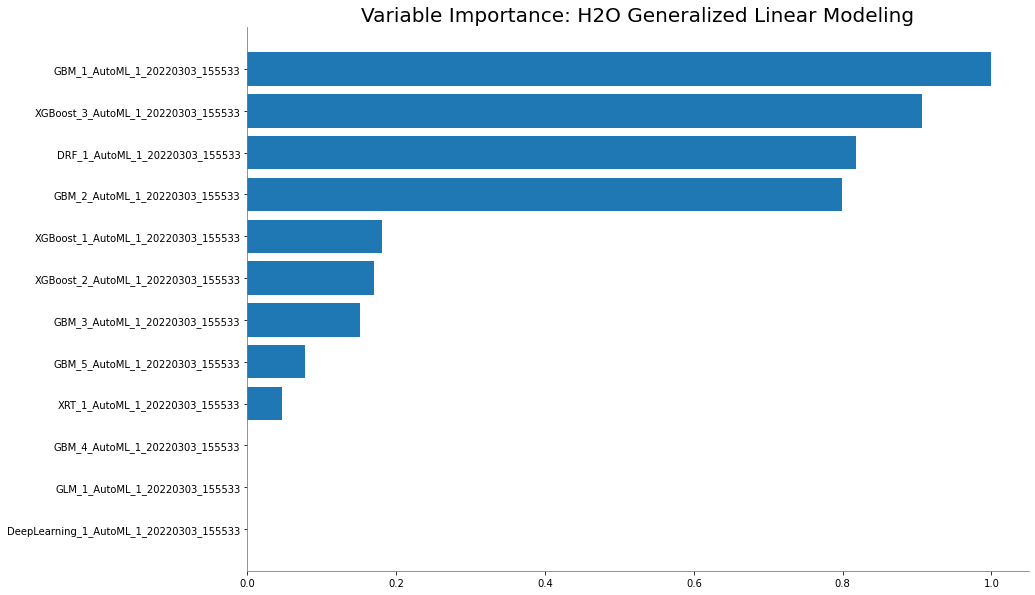

<Figure size 432x288 with 0 Axes>

In [41]:
metalearner.varimp_plot(num_of_features=20)

In [45]:
metalearner.varimp_plot?

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  metalearner_AUTO_StackedEnsemble_AllModels_2_AutoML_1_20220303_155533


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 0.001682 )",12,9,6,levelone_training_StackedEnsemble_AllModels_2_AutoML_1_20220303_15...




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.06158207200958429
RMSE: 0.2481573533256355
LogLoss: 0.19487366498320985
Null degrees of freedom: 33982
Residual degrees of freedom: 33973
Null deviance: 24577.676297843824
Residual deviance: 13244.78351424884
AIC: 13264.78351424884
AUC: 0.9358693307794695
AUCPR: 0.6359566466938142
Gini: 0.8717386615589391

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30929549159115166: 


,,no,yes,Error,Rate
0,no,27653.0,2342.0,0.0781,(2342.0/29995.0)
1,yes,1056.0,2932.0,0.2648,(1056.0/3988.0)
2,Total,28709.0,5274.0,0.1,(3398.0/33983.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.309295,0.633125,213.0
1,max f2,0.118956,0.737644,295.0
2,max f0point5,0.503538,0.613864,139.0
3,max accuracy,0.503538,0.909837,139.0
4,max precision,0.974557,1.000000,0.0
5,max recall,0.000574,1.000000,399.0
6,max specificity,0.974557,1.000000,0.0
7,max absolute_mcc,0.297380,0.584112,217.0
8,max min_per_class_accuracy,0.155048,0.863944,276.0
9,max mean_per_class_accuracy,0.107945,0.871405,302.0



Gains/Lift Table: Avg response rate: 11.74 %, avg score: 11.74 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010005,0.825449,7.268180,7.268180,0.852941,0.867810,0.852941,0.867810,0.072718,0.072718,626.817954,626.817954,0.071051
1,2,0.020010,0.763281,6.516299,6.892239,0.764706,0.793812,0.808824,0.830811,0.065196,0.137914,551.629890,589.223922,0.133580
2,3,0.030015,0.709131,6.040108,6.608195,0.708824,0.734997,0.775490,0.798873,0.060431,0.198345,504.010782,560.819542,0.190710
3,4,0.040020,0.668826,5.363415,6.297000,0.629412,0.688760,0.738971,0.771345,0.053661,0.252006,436.341525,529.700038,0.240171
4,5,0.050025,0.633288,5.413541,6.120308,0.635294,0.650667,0.718235,0.747209,0.054162,0.306169,441.354062,512.030843,0.290199
5,6,0.100021,0.476033,4.654373,5.387556,0.546204,0.552962,0.632245,0.650114,0.232698,0.538867,365.437277,438.755624,0.497193
6,7,0.150016,0.322722,3.631213,4.802223,0.426133,0.399256,0.563554,0.566511,0.181545,0.720411,263.121324,380.222341,0.646232
7,8,0.200012,0.193294,2.196784,4.150959,0.257799,0.255778,0.487127,0.488839,0.109829,0.830241,119.678370,315.095931,0.714021
8,9,0.300003,0.066916,1.168609,3.156940,0.137139,0.119807,0.370476,0.365841,0.116851,0.947091,16.860868,215.693995,0.733122
9,10,0.399994,0.025773,0.343561,2.453647,0.040318,0.042277,0.287942,0.284956,0.034353,0.981444,-65.643908,145.364693,0.658757




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.061683789537548765
RMSE: 0.24836221439170003
LogLoss: 0.19523429711608437
Null degrees of freedom: 33982
Residual degrees of freedom: 33974
Null deviance: 24579.32332504483
Residual deviance: 13269.294237791792
AIC: 13287.294237791792
AUC: 0.9356058298248638
AUCPR: 0.6346792317524697
Gini: 0.8712116596497277

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.312825693178695: 


,,no,yes,Error,Rate
0,no,27690.0,2305.0,0.0768,(2305.0/29995.0)
1,yes,1072.0,2916.0,0.2688,(1072.0/3988.0)
2,Total,28762.0,5221.0,0.0994,(3377.0/33983.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.312826,0.633294,214.0
1,max f2,0.121313,0.737462,296.0
2,max f0point5,0.498348,0.612645,141.0
3,max accuracy,0.502319,0.909572,139.0
4,max precision,0.980038,1.000000,0.0
5,max recall,0.000622,1.000000,399.0
6,max specificity,0.980038,1.000000,0.0
7,max absolute_mcc,0.303029,0.584456,218.0
8,max min_per_class_accuracy,0.155035,0.863777,279.0
9,max mean_per_class_accuracy,0.107712,0.870979,303.0



Gains/Lift Table: Avg response rate: 11.74 %, avg score: 11.73 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010005,0.826516,7.243117,7.243117,0.850000,0.867478,0.850000,0.867478,0.072467,0.072467,624.311685,624.311685,0.070767
1,2,0.020010,0.761554,6.566424,6.904771,0.770588,0.792924,0.810294,0.830201,0.065697,0.138164,556.642427,590.477056,0.133864
2,3,0.030015,0.707808,5.914794,6.574779,0.694118,0.734321,0.771569,0.798241,0.059178,0.197342,491.479438,557.477850,0.189574
3,4,0.040020,0.668523,5.363415,6.271938,0.629412,0.688070,0.736029,0.770698,0.053661,0.251003,436.341525,527.193769,0.239034
4,5,0.050025,0.633325,5.388478,6.095246,0.632353,0.649994,0.715294,0.746557,0.053912,0.304915,438.847793,509.524574,0.288779
5,6,0.100021,0.475786,4.679450,5.387556,0.549147,0.552486,0.632245,0.649550,0.233952,0.538867,367.945021,438.755624,0.497193
6,7,0.150016,0.322915,3.611151,4.795537,0.423779,0.398719,0.562770,0.565956,0.180542,0.719408,261.115129,379.553741,0.645096
7,8,0.200012,0.193219,2.226877,4.153467,0.261330,0.255952,0.487421,0.488467,0.111334,0.830742,122.687663,315.346669,0.714590
8,9,0.300003,0.067207,1.158578,3.155268,0.135962,0.119942,0.370280,0.365637,0.115848,0.946590,15.857770,215.526828,0.732554
9,10,0.399994,0.025898,0.348576,2.453647,0.040906,0.042411,0.287942,0.284837,0.034855,0.981444,-65.142359,145.364693,0.658757




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.899522,0.003747,0.897111,0.894104,0.901822,0.901845,0.902731
1,auc,0.935587,0.001646,0.937394,0.934025,0.937303,0.934979,0.934236
2,err,0.100478,0.003747,0.102889,0.105896,0.098178,0.098155,0.097269
3,err_count,682.800000,22.587606,698.000000,713.000000,679.000000,665.000000,659.000000
4,f0point5,0.583748,0.010029,0.582822,0.573568,0.592157,0.574525,0.595668
5,f1,0.635382,0.009118,0.649246,0.629225,0.640170,0.628284,0.629983
6,f2,0.697579,0.022938,0.732759,0.696844,0.696655,0.693143,0.668494
7,lift_top_group,7.276795,0.077416,7.179098,7.247975,7.264706,7.389949,7.302247
8,logloss,0.195246,0.003554,0.193917,0.198962,0.193538,0.190919,0.198896
9,max_per_class_error,0.253286,0.037234,0.198511,0.249380,0.259804,0.255629,0.303106



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_xval,deviance_se,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-03-03 16:05:01,0.000 sec,5,6622.453057,0.195779,0.5,0.001682,0.389751,0.390493,0.174663,0.248154,0.194875,0.405487,0.935940,0.636000,7.243117,0.099638
1,,2022-03-03 16:05:02,0.243 sec,6,6622.764343,0.196503,1.0,0.001682,0.389769,0.390493,0.174663,0.248157,0.194874,0.405470,0.935869,0.635957,7.268180,0.099991



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,GBM_1_AutoML_1_20220303_155533,0.641187,1.000000,0.240934
1,XGBoost_3_AutoML_1_20220303_155533,0.581212,0.906462,0.218397
2,DRF_1_AutoML_1_20220303_155533,0.524704,0.818332,0.197164
3,GBM_2_AutoML_1_20220303_155533,0.512014,0.798541,0.192396
4,XGBoost_1_AutoML_1_20220303_155533,0.116282,0.181354,0.043694
5,XGBoost_2_AutoML_1_20220303_155533,0.109411,0.170638,0.041112
6,GBM_3_AutoML_1_20220303_155533,0.097384,0.151880,0.036593
7,GBM_5_AutoML_1_20220303_155533,0.049353,0.076971,0.018545
8,XRT_1_AutoML_1_20220303_155533,0.029711,0.046338,0.011164
9,GBM_4_AutoML_1_20220303_155533,0.000000,0.000000,0.000000
